# **LIBRARY**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# **READING THE DATA**

In [0]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df=pd.read_csv('/content/drive/My Drive/MiningProcess_Flotation_Plant_Database.csv',parse_dates=False,decimal=',')

In [0]:
df[:5]

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


### **EXPLANATION OF PARAMETERS**

1. pd.read_csv--- used to read the csv files
2. decimal (,)--- parameter since our dataset has misformatted readings so by using the decimal parameter to recongize the decimal parts
3.parse_dates---is used to parse the date and used to recongise the date format and orients the data according to given format and parse it

# **HIGH LEVEL STATISTICS**

In [0]:
#HABERMAN ASSIGNMENT--https://classroom.appliedcourse.com/classrooms/jEARG7xb/assignment/4VAjo7jL/user/BmAM41O1/

print("SHAPE OF DATAFRAME",df.shape)
print("*"*1000)
print("COLUMNS IN THE DATAFRAME",df.columns)


SHAPE OF DATAFRAME (737453, 24)
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

##**INFERENCES**
 
 1. THE SHAPE OF DATASET IS (737453,24) WHICH MEANS THE DATASET HAS TOTAL 737453 DATA SAMPLES GENERATED EVERY 20 SECS FROM MARCH 2017 TO SEPTEMBER 2017 AND THERE ARE 24 FEATURES TO DETERMINE THE PERCENTAGE OF SILICA CONCENTERATE .

 2. THE COLUMNS CAN BE STUDIED AS TWO PARTS:
 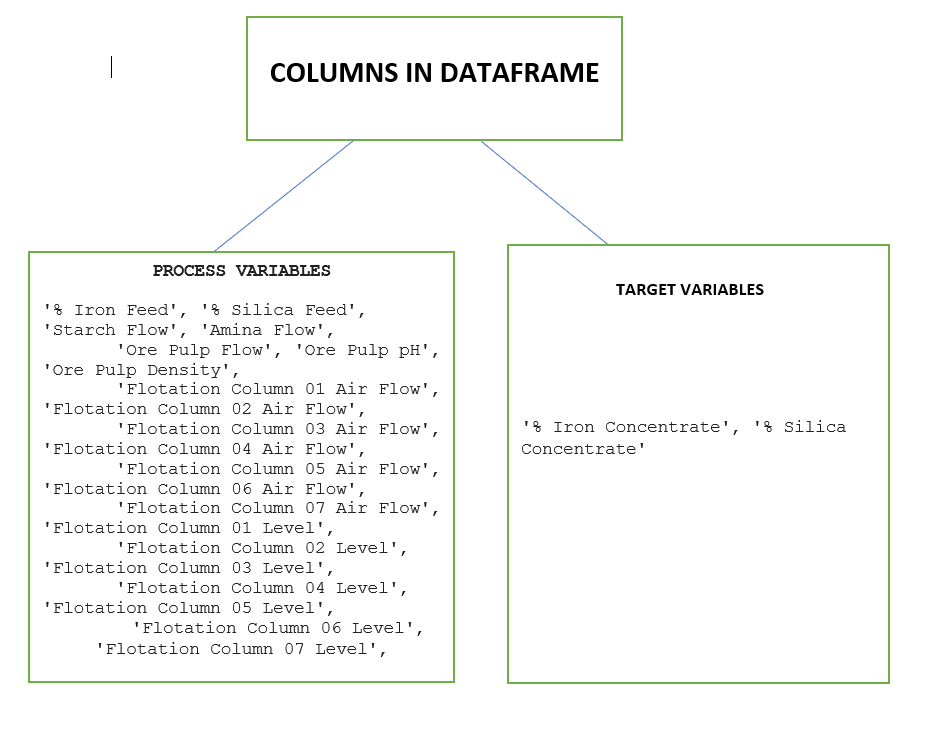

## **DATA TYPE OF ALL THE COLUMNS**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

##**DESCRIPTION OF THE DATAFRAME**

In [0]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


## **DESCRIPTION OF THE DATAFRAME**

1. THE COUNT,MEAN STD,MIN,DIFFERENT PERCENTILES AMD MAX IN EACH COLUMNS IS DESCRIBED 

  **COUNT** : INDICATES THE NUMBER OF VARIABLES IN EACH COLUMN.

   **MEAN**  : THE MEAN FROM FLOATION OF AIR FLOW  AND LEVEL 01-07 IS ALMOST SAME MEANS ONLY SMALL CHANGES ARE MADE FOR EVERY 20 SECONDS. 

   ***% silica concenteerate MEAN IS LESS FROM % IRON CONCENTRATE WHICH MEANS IRON FROM ORE OBTAINED IS MORE AND IMPURITIES LEVEL IS LESS FROM THESE TYPE OF ORE.***

  ** 25 %** : THE 25 % OF SILICA CONCENTRATE LIES BETWEEN 1.44 WHICH MEANS OUT   OF 737453 SAMPLES WE ARE GETTING 300,000 SAMPLES OF SILICA CONCENTRATE LESS  THAN 
  1.12 WHEN % IRON FEED AND % SILICA FEED IS LESS THAN 53% AND 9%.

  **50%** : THE 50 % OF SILICA CONCENTRATE LIES BETWEEN 2.00 WHICH MEANS OUT OF  737453 SAMPLES WE ARE GETTING 400,000 SAMPLES OF SILICA CONCENTRATE LESS  THAN 
     2.00 WHEN % IRON FEED AND % SILICA FEED IS LESS THAN 56% AND 14%.

  **75%** : THE 75 % OF SILICA CNCENTRATE LIES BETWEEN 3 WHICH MEANS OUT OF 737453 SAMPLES WE ARE GETTING  553089 SAMPLES OF SILICA CONCENTRATE LESS  THAN 
     3.00 WHEN % IRON FEED AND % SILICA FEED IS LESS THAN 60% AND 20%.

     WITH THE HELP OF THESE PERCENTILES WE CAN DRAW TO CONCLUSION FOR INCREASE IN THE FEED RATES WE CAN SEE THE INCREASE IN % SILICA CONCENTRATE AND IRON CONCENTRATE 


# **Checking which variables have hourly vs 20-sec frequency**

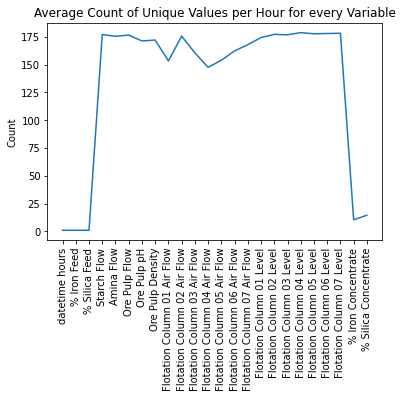

In [0]:
#https://towardsdatascience.com/a-basic-guide-into-time-series-analysis-2ad1979c7438
#https://www.cognoesis.com/time-series-data-exploratory-data-analysis-forecast/
unique_avg = []
for col in df.columns:
    unique_avg.append(df.groupby('datetime hours').apply(lambda x: len(x[col].unique())).mean())
plt.plot(np.arange(len(unique_avg)), unique_avg)
plt.title('Average Count of Unique Values per Hour for every Variable')
plt.ylabel('Count')
plt.xticks(list(range(len(unique_avg))), list(df.columns), rotation='vertical')
plt.show()

## **EXPLANATION**

**NEED**

   SINCE, THE DATA ARE SAMPLED FOR EVERY 20 SECS AND WHICH ARE MAIN PROCESS VARIABLES THAT ARE CHANGED FOR EVERY 20 SEC AND THE VARIABLES CHANGED FOR EVERY ONE HOUR .


**INFORMATION OBTAINED**
   
   
   THE PLOT EXPLAINS ABOUT THE CHANGE OF VARIABLES IN ONE HOUR AND THE VARIABLES LIKE IRON FEED SILICA FEED DO NOT CHANGE MUCH IN THE HOUR.

   THE SCALE IS FROM 0 TO 180 RECORDS BECAUSE FOR EVERY 20 SECS WE ARE SAMPLING HENCE FOR ONE HOUR WE GET 180 RECORDS IN TOTAL SO THE SCALE ARE FROM 0 - 180 .

   THE VARIABLES LIKE FLOATATION AIR FLOW AND LEVEL CHANGES IN ONE HOUR . HENCE, THE MPOST IMPORTANT VARIABLES ARE AIR-FLOW AND LEVEL. CONTROLLING THESE VARIABLES CAN BE USED TO CONTROL TYE YIELD RATE OF SILICA CONCENTRATE.

    

## **PAIR PLOTS**

In [0]:
pair_cols = list(df.columns[2:8])
pair_cols.extend(df.columns[-2:])
print(pair_cols)
#smol_df = clean_df.loc[:,pair_cols]


['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', '% Iron Concentrate', '% Silica Concentrate']


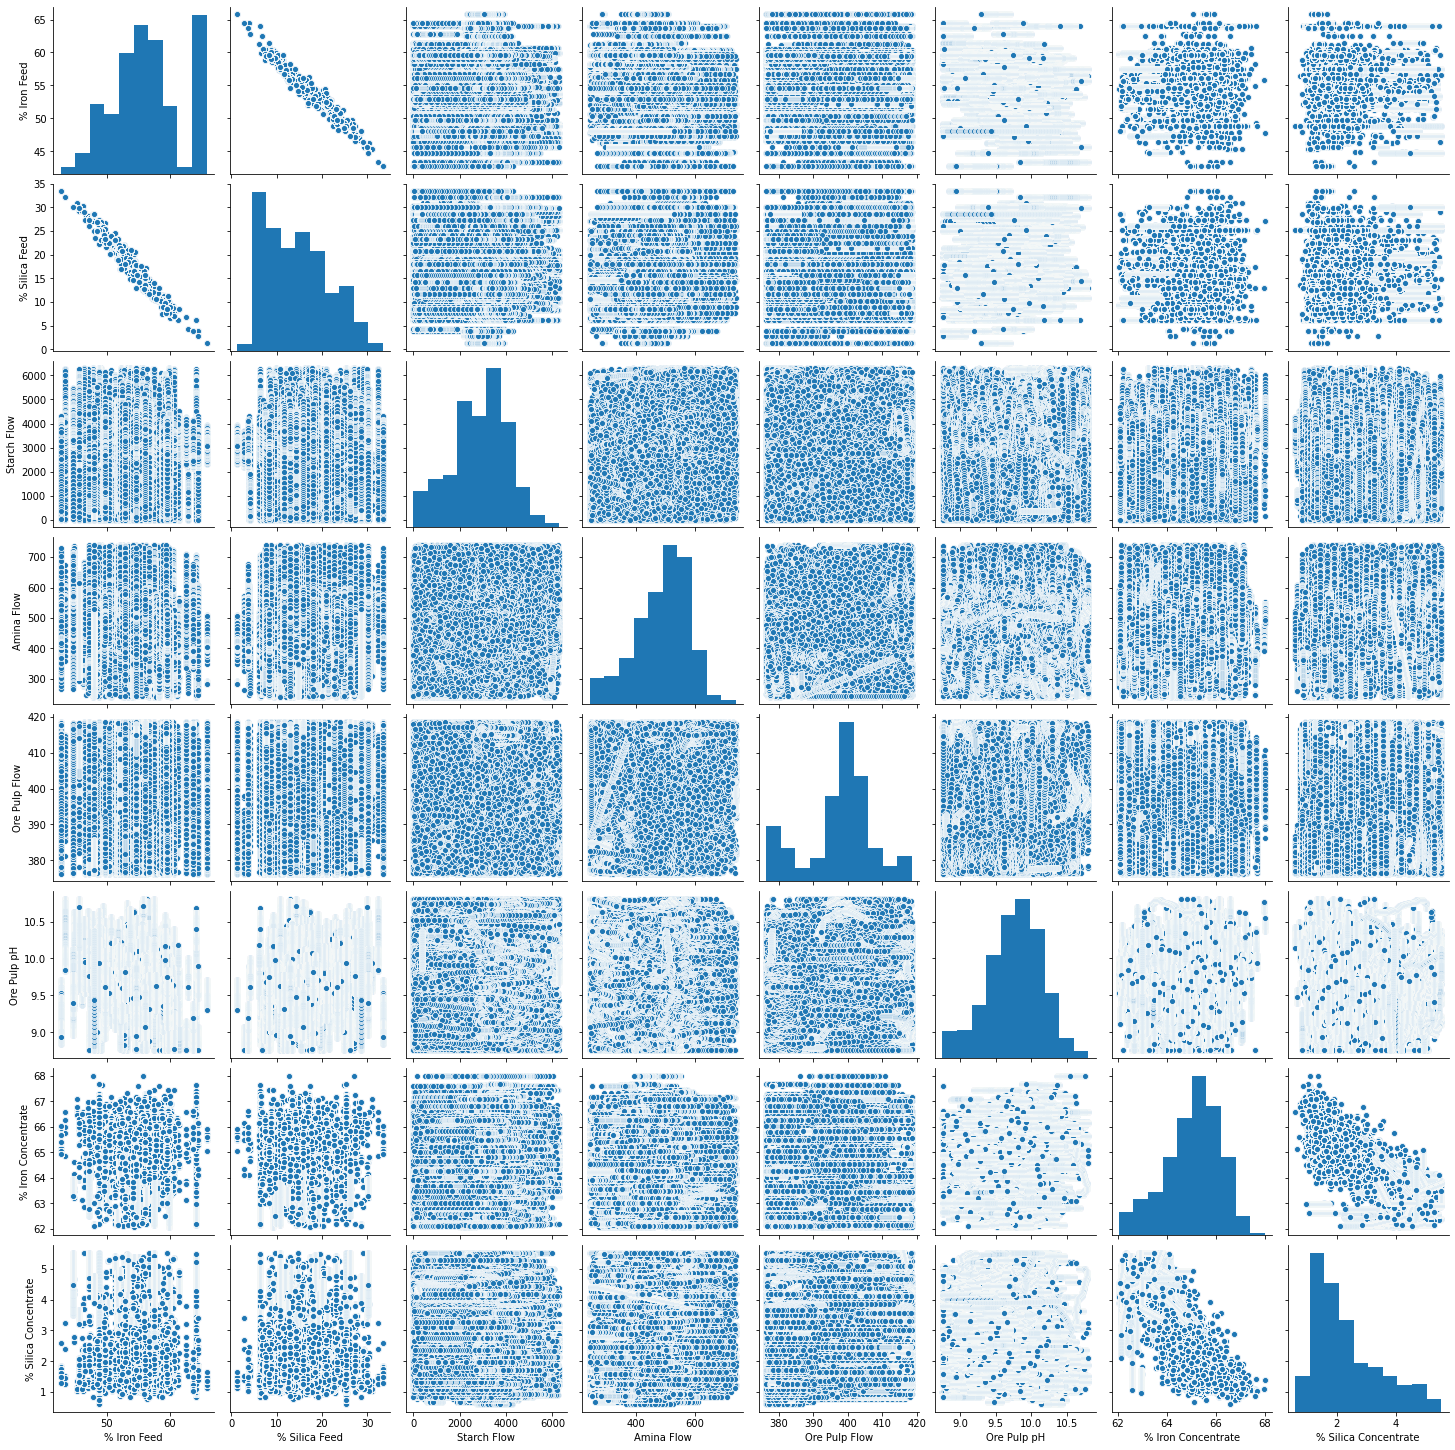

In [0]:
sns.pairplot(df.loc[:,pair_cols])
plt.show()

## **INFERENCES**
 
**NEED**

 THE PLOT IS USEFUL TO GIVE OVERVIEW ABOUT THE CORRELATION OF FEATURES . IN THIS PLOT WE ARE NOT CONSIDERING THE FLOATATION OF AIRFLOW AND LEVEL BCAUSE THEY ARE HIGHLY CORRELATED SO WE ARE MAINLY TAKING CERTAIN FEATURES INTO CONSIDERATION AND TRY TO DRAW CONCLUSIONS FROM IT.
 
**INFORMATION OBTAINED:**

  
1.   NO APPARENT MEANINGFUL PATTERNS BESIDES BETWEEN IRON AND SILICA CONCENTRATE AND IRON AND SILICA FEED (WHICH ARE TO BE EXPECTED).

    WE ALSO DECIDED TO CHECK WHICH MINUTE OF THE HOUR SHOWED THE HIGHEST CORRELATION WITH % SILICA CONCENTRATE FOR EACH VARIABLE. OUR HYPOTHESIS WAS THAT THEY SHOULD PEAK AROUND WHEN THE MEASUREMENTS WHERE USUALLY TAKEN.


2.   WE OBSERVE A NEGATIVE CORRELATION BETWEEN THE IRON AND SILICA CONCENTRATE AND WE OBSERVE THAT WHEN THERE IS LARGE AMOUNT OF IRON CONCENTRATE IN IRON ORE WE GET MINIMUM IMPURITIES (SILICA CONCENTRATE) WHICH CONCLUDES THAT IRON ORE WE USE IT FOR OUR PROCESS IS OF HIGH QUALITY .



## **TREND OF SILICA CONCENTRATE IN ONE DAY**

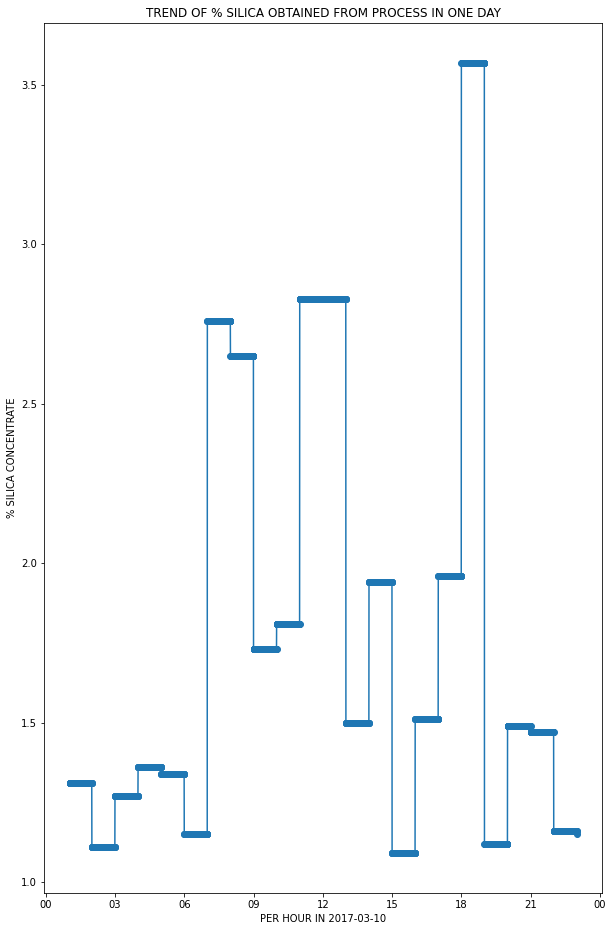

In [0]:
#https://matplotlib.org/3.1.1/api/dates_api.html
#https://www.programcreek.com/python/example/61483/matplotlib.dates.DateFormatter
# blog about petrol consumption in one day graph
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(10,16))
ax.plot(df.loc['2017-03-10 1:00:00':'2017-03-10 23:00:00', '% Silica Concentrate'], marker='o', linestyle='-')
ax.set_ylabel('% SILICA CONCENTRATE')
ax.set_title('TREND OF % SILICA OBTAINED FROM PROCESS IN ONE DAY')
ax.set_xlabel('PER HOUR IN 2017-03-10')
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

## **INFERENCES**

1 . **NEED**

 SINCE THE ABOVE PLOTS ARE NOT CLEAR TO DRAW IMPORTANT INFORMATION WE GO FOR ONE DAY ANALYSIS INORDER TO GET ANY IMPORTANT CONCLUSIONS.

**INFORMATION OBTAINED**

THE PLOT MAINLY FOCUS THE TREND OF % SILCCA CONCENTRATE IN ONE DAY(2017-03-10) AND WE GET THE IDEA THT THE SILICA CONCENTRATE IS NOT SAME FOR ONE DAY IT IS HIGHLY CHANGING FOR EVERY HOUR BASED ON SEVERAL FACTORS.

THE HIGHEST PEAK IS REACHED AT THE LATE HOURS IN ONE DAY AND BEFORE REACHING THE MAXIMUN VALUE IT ALSO REACHED ITS MINMUM VALUE AT 15:00 AND THE % SILICA CONCENTRATE IS NOT MONOTONIC GRAPH OR LINEAR GRAPH IT S HIGHLY NON-LINEAR GRAPH.




# **PARAMETERS OF HIGHEST AND LOWEST PEAK IN THE ABOVE GRAPH**

In [0]:
s=df.loc['2017-03-10 18:00:00']
m=df.loc['2017-03-10 15:00:00']
print(s)
print("-----------------------------------------------------")
print(m)

datetime hours                  2017-03-10 18:00:00
% Iron Feed                                   55.99
% Silica Feed                                 17.16
Starch Flow                                 5611.82
Amina Flow                                  535.553
Ore Pulp Flow                               397.676
Ore Pulp pH                                 10.2855
Ore Pulp Density                            1.75575
Flotation Column 01 Air Flow                252.235
Flotation Column 02 Air Flow                249.598
Flotation Column 03 Air Flow                248.687
Flotation Column 04 Air Flow                295.096
Flotation Column 05 Air Flow                  306.4
Flotation Column 06 Air Flow                249.906
Flotation Column 07 Air Flow                  251.4
Flotation Column 01 Level                   559.771
Flotation Column 02 Level                   538.144
Flotation Column 03 Level                    552.23
Flotation Column 04 Level                   541.228
Flotation Co

# **INFERENCES**

1. THE ABOVE DATA IS ABLE TO DRAW CONCLUSION ABOUT THE BEHAVIOUR OF THE VARIABLES TO REACH THE MAXIMUM SILICA CONCENTRATE 

|**COMPARISION OF PROCESS VALUES**

THE IRON CONCENTRATE IN THE HIGHEST VALUE IS MINIMUM AND IN THE LOWEST VALUE FOR SILICA CONCENTRATE THE VALUE OF IRON CONCENTRATE IS HIGHER WHICH STRONGLY SUPPORT OUR POINT OF NEGATIVE CORRELATION BETWEEN THE ABOVE VARIABLES.

FOR LESS IRON FEED WE ARE GETTING LESS SILICA CONCENTRATE AND TO FIND THE RELATION BETWEEN THE VARIABLES WE GO FOR THE FUTHER BREAK DOWN THE ANALYSIS.

THE REAGENT FLOW IS IMPORTANT IN ANY INDUSTRIAL PROCESS ISNCE IT ACTS AS CATALYST FOR THE PROCESS HENCE , THE STUDY OF ITS IMPACT ON SILICA IS ALOS IMPORANT AND WE QUANTITVELY CONCLUDE THAT THE AMINA FLOW VALUES AFFECT THE SILICA CONCENTARTE 




# **IRON FEED VS SILICA CONCENTRATE**

Text(0.5, 0, 'IRON FEED PER HOUR IN 2017-03-10')

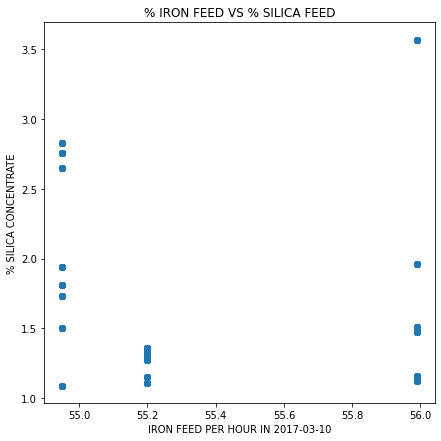

In [0]:
fig, ax = plt.subplots(figsize=(7,7))
amina_A=df.loc[:3994, '% Iron Feed']
amina_s=df.loc[:3994, '% Silica Concentrate']
ax.scatter(amina_A,amina_s, marker='o', linestyle='-')

ax.set_ylabel('% SILICA CONCENTRATE')
ax.set_title('% IRON FEED VS % SILICA FEED')
ax.set_xlabel('IRON FEED PER HOUR IN 2017-03-10')




## **INFERENCES**

**NEED**

SINCE FROM TREND GRAPH WE OBTAINED CERTAIN REALTION SO FOR DEEP ANALYSIS WE HAVE PLOTTED THE IRON VS SILICA CONCENTRATE TO GET PATTERN.

**INFORMATION**

WE OBSERVE THAT THERE IS NO DATAPOINTS IN RANGE 55.2 TO 55.8 WHICH TELLS MOST OF THE POINTS LIES EITHER LESSTHAN 55.2 AND GREATER THN 55.8.

FOR RANGES LESS THAN 55.2 THE SILICA CONCENTRATE  ARE MAXIMUN UPTO 2.8 AND MINIMUM CVALUES IS GRETER THAN 1 

FOR RANGES GRATER THAN 55.8 THE SILICA CONCENTRATE IS ACHIEVING THE MAXIMUM OF 3.5 AND MIMIMUM OF 1.5 

FROM ANALYSISING THE TWO RANGES , ONE CAN CONCLUDE THAT WE MORE THE IRON FEED GRETER IS THE SILICA CONCENTRATE.


## **SILICA FEED VS SILICA CONCENTRATE**

Text(0.5, 0, 'SILICA FEED PER HOUR IN 2017-03-10')

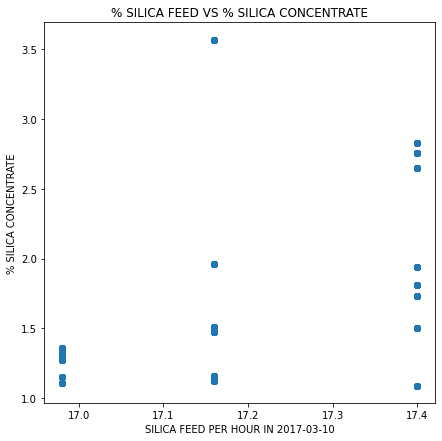

In [0]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(7,7))
amina_A=df.loc[:3994, '% Silica Feed']
amina_s=df.loc[:3994, '% Silica Concentrate']
ax.scatter(amina_A,amina_s, marker='o', linestyle='-')

ax.set_ylabel('% SILICA CONCENTRATE')
ax.set_title('% SILICA FEED VS % SILICA CONCENTRATE')
ax.set_xlabel('SILICA FEED PER HOUR IN 2017-03-10')




## **INFERENCES**

**NEED**

SINCE FROM TREND GRAPH WE OBTAINED CERTAIN REALTION SO FOR DEEP ANALYSIS WE HAVE PLOTTED THE SILICA FEED VS SILICA CONCENTRATE TO GET PATTERN.

**INFORMATION**

WE ANALYSE THE GRAPH INTO THREE SECTION BASED ON RANGES:

FOR RANGES LESS THAN 17.15 THE SILICA CONCENTRATE  ARE MAXIMUN UPTO 1.4 

FOR RANGES GRATER THAN 17.15 TO 17.4  THE SILICA CONCENTRATE IS ACHIEVING THE MAXIMUM OF 3.5 AND MIMIMUM OF 1.5 

AT 17.4  THE SILICA CONCENTRATE IS ACHIEVING THE MAXIMUM OF 3 AND MIMIMUM OF 1.10 

FROM ANALYSISING THE THREE RANGES , ONE CAN CONCLUDE THAT WE MORE THE SILICA FEED IS NOT IMPACTING SILICA CONCENTRATE  AS WE THOUGHT.

## **IRON CONCENTRATE VS SILICA CONCENTARTE**

Text(0.5, 0, 'IRON CONCENTRATE PER HOUR IN 2017-03-10')

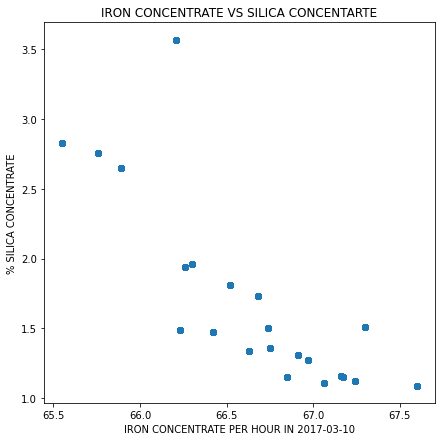

In [0]:
#https://www.kaggle.com/schummel/froth-floating-process-with-random-forests
fig, ax = plt.subplots(figsize=(7,7))
amina_A=df.loc[:3994, '% Iron Concentrate']
amina_s=df.loc[:3994, '% Silica Concentrate']
ax.scatter(amina_A,amina_s, marker='o', linestyle='-')

ax.set_ylabel('% SILICA CONCENTRATE')
ax.set_title('IRON CONCENTRATE VS SILICA CONCENTARTE')
ax.set_xlabel('IRON CONCENTRATE PER HOUR IN 2017-03-10')




## **INFERENCES**

**NEED**

SINCE FROM TREND GRAPH WE OBTAINED CERTAIN REALTION SO FOR DEEP ANALYSIS WE HAVE PLOTTED IRON CONCENTRATE VS SILICA CONCENTRATE TO GET PATTERN.

**INFORMATION**
 
THE MOST IMPORTANT PLOT FOR OUR TASK IS IRON CONCENTRATE VS SILICA CONCENTRATE AND WE SEE LOT OF OBSERVATIONS 

1. THE IRON AND SILICA CONCENTRATE ARE HIGHLY CORRELATED IN A NEGATIVE MANNER.

2. EXCEPT FOR ONE POINT , WE CAN FORM A DECREASING CLOUD PATTERN IN GRAPH AND WHEN THERE IS INCREASE IN THE IRON CONCENTRATE THERE IS DECRAESE IN THE SILICA CONCENTRATE WHICH INDIRECTLY INDICATES THAT THE AMOUNT OF IRON CONCENTRATE IN THAT PARTIULAR BATCH FEED IS HIGH AND LESS WITH IMPURITIES 

WE ARE MAING VERY IMPORTANT CONCLUSION FROM ABOVE PLOT THAT BOTH THE VARUIBALES ARE NEGATIVELY CORRELATED 


# **AMINA FLOW VS SILICA CONCENTRATE**

Text(0.5, 0, 'AMINA FLOW PER HOUR IN 2017-03-10')

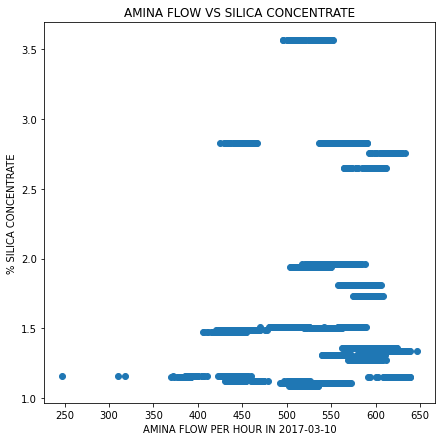

In [0]:
#https://en.wikipedia.org/wiki/Reagent
#https://www.kaggle.com/tastycanofmalk/predict-silica-concentration
fig, ax = plt.subplots(figsize=(7,7))
amina_A=df.loc[:3994, 'Amina Flow']
amina_s=df.loc[:3994, '% Silica Concentrate']
ax.scatter(amina_A,amina_s, marker='o', linestyle='-')

ax.set_ylabel('% SILICA CONCENTRATE')
ax.set_title('AMINA FLOW VS SILICA CONCENTRATE')
ax.set_xlabel('AMINA FLOW PER HOUR IN 2017-03-10')

## **INFERENCES**

**NEED**

SINCE FROM TREND GRAPH WE OBTAINED CERTAIN REALTION SO FOR DEEP ANALYSIS WE HAVE PLOTTED THE AMINA FLOW VS SILICA CONCENTRATE TO GET PATTERN.

**INFORMATION**

A REAGENT IS A SUBSTANCE OR COMPOUND ADDED TO A SYSTEM TO CAUSE A CHEMICAL REACTION, OR ADDED TO TEST IF A REACTION OCCURS. THE TERMS REACTANT AND REAGENT ARE OFTEN USED INTERCHANGEABLY—HOWEVER, A REACTANT IS MORE SPECIFICALLY A SUBSTANCE CONSUMED IN THE COURSE OF A CHEMICAL REACTION.

THE REAGENT INCREASES THERE IS VARIATION IN THE SILICA CONCENTRATE BUT FOR SMALL VALUES WE CAN OBSERVE VERY LITTLE SILICA CONCENTRATE. 

#**BOX-PLOTS**

**NEED**

TO FIND THE OUTLIERS IN DATASET

WE BREAK DOWN THE ANALYSIS INTO THREE BOX PLOTS 

1. FIRST PLOT FOCUS ON THE FLOATION AIR FLOW 

2. SECOND PLOT FOCUS ON FLOATTION LEVEL 


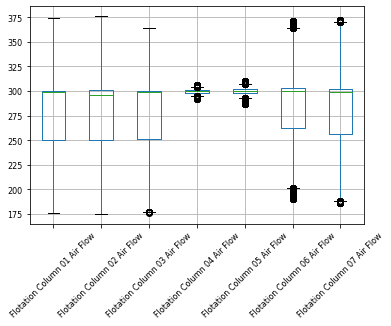

In [0]:
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
boxplot = df.boxplot(column=['Flotation Column 01 Air Flow','Flotation Column 02 Air Flow','Flotation Column 03 Air Flow','Flotation Column 04 Air Flow','Flotation Column 05 Air Flow','Flotation Column 06 Air Flow','Flotation Column 07 Air Flow'], rot=45, fontsize=8)

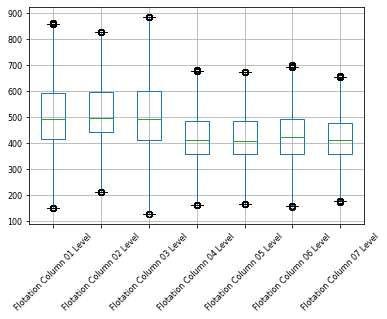

In [0]:
boxplot = df.boxplot(column=['Flotation Column 01 Level','Flotation Column 02 Level','Flotation Column 03 Level','Flotation Column 04 Level','Flotation Column 05 Level','Flotation Column 06 Level','Flotation Column 07 Level'], rot=45, fontsize=8)

##**INFERENCES**

THE FIRST AND  SECOND  PLOT HAS LOT OF OUTLIERS AND REMOVING OF OUTLIERS CAN LEAD TO BAD MODEL HENCE, OULIERS SHOULD NOT BE REMOVED FROM DATASET.

THE BOX-PLOTS ARE DRWAN ONLY FOR FLOATION AIRFLOW AND LEVEL BECAUSE THESE ARE MOST VARIABLES WHICH VARIED IN THE ONE HOUR AND MAY INCLUDE OUTLIERS .

BUT, DROPPING THESE OUTLIER WILL LEAD TO BAD MODEL .



#**SUMMARY**

1. IN HIGH LVEL STATISTCS,1. THE SHAPE OF DATASET IS (737453,24) WHICH MEANS THE DATASET HAS TOTAL 737453 DATA SAMPLES GENERATED EVERY 20 SECS FROM MARCH 2017 TO SEPTEMBER 2017 AND THERE ARE 24 FEATURES TO DETERMINE THE PERCENTAGE OF SILICA CONCENTERATE .

2.  WITH THE HELP OF THESE PERCENTILES WE CAN DRAW TO CONCLUSION FOR INCREASE IN THE FEED RATES WE CAN SEE THE INCREASE IN % SILICA CONCENTRATE AND IRON CONCENTRATE 

3. FROM THE TREND OF % SILICA CONCENTRATE GRAPH  WE GET THE MOST IMPORTANT VARIABLES ARE AIR-FLOW AND LEVEL. CONTROLLING THESE VARIABLES CAN BE USED TO CONTROL TYE YIELD RATE OF SILICA CONCENTRATE.

4. WE CAN CONCLUDE FROM IRON FEED GRAPH THAT WE MORE THE IRON FEED GRETER IS THE SILICA CONCENTRATE.

5. WE ARE MAING VERY IMPORTANT CONCLUSION FROM IRON CONCENTRATE VS SILICA CONCENTRATE PLOT THAT BOTH THE VARUIBALES ARE NEGATIVELY CORRELATED.

6. THE REAGENT INCREASES THERE IS VARIATION IN THE SILICA CONCENTRATE BUT FOR SMALL VALUES WE CAN OBSERVE VERY LITTLE SILICA CONCENTRATE. 

#**PRE-PROCESSING OF DATA**

## **MISSING VALUES** 

In [0]:
#https://towardsdatascience.com/data-pre-processing-techniques-you-should-know-8954662716d6
#https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
counts = df.groupby('date').count()
counts

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174
2017-03-10 02:00:00,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
2017-03-10 03:00:00,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
2017-03-10 04:00:00,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
2017-03-10 05:00:00,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
2017-09-09 20:00:00,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
2017-09-09 21:00:00,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180


## **CALCULATION**

ONE HR = 3600 SECS

SAMPLES AT 20 SECONDS

LET US HAVE ONE RECORD AT END OF 20 SECS

SO, 3600/20 = 180 

WHICH MEANS WE GET 180 RECORDS FOR ONE HOUR SO WE NEED TO WE FIND THE NUMBER OF RECORDS = 180 AND IF IT EQUAL WE ARE LUCKY TO COCNLUDE THERE IS NO MISSING VALUE ELSE WE NEED TO FILL THOSE MISSIN VALUES


In [0]:
counts_less=counts<180
counts_less

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2017-03-10 02:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-03-10 03:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-03-10 04:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-03-10 05:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-09-09 20:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2017-09-09 21:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
df.iloc[:,0]

0        2017-03-10 01:00:00
1        2017-03-10 01:00:00
2        2017-03-10 01:00:00
3        2017-03-10 01:00:00
4        2017-03-10 01:00:00
                 ...        
737448   2017-09-09 23:00:00
737449   2017-09-09 23:00:00
737450   2017-09-09 23:00:00
737451   2017-09-09 23:00:00
737452   2017-09-09 23:00:00
Name: date, Length: 737453, dtype: datetime64[ns]

In [0]:
len(df)

737453

WE ARE LUCKY ENOUGH TO HAVE ONLY SIX MISSING RECORD FROM THE DATASET AND WE CAN FILL THOSE MISSING VALUES BY CONVERSION METHODS

#  **MISSING VALUES TREATMENT**

In [0]:
#https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
#https://www.kaggle.com/juejuewang/handle-missing-values-in-time-series-for-beginners
date_range=pd.date_range(start='2017-03-10 1:00:00',end='2017-09-09 23:59:40',freq='20S')
date_range = date_range[6:]
date_range[-5:]

DatetimeIndex(['2017-09-09 23:58:20', '2017-09-09 23:58:40',
               '2017-09-09 23:59:00', '2017-09-09 23:59:20',
               '2017-09-09 23:59:40'],
              dtype='datetime64[ns]', freq='20S')

In [0]:
hours=pd.Series(df['date'].unique())
hours.index = hours
len(hours)

4097

In [0]:
hours_list = hours.index.format()
print(hours_list[:5])
seconds_list = date_range.format()
print(seconds_list[:5])

['2017-03-10 01:00:00', '2017-03-10 02:00:00', '2017-03-10 03:00:00', '2017-03-10 04:00:00', '2017-03-10 05:00:00']
['2017-03-10 01:02:00', '2017-03-10 01:02:20', '2017-03-10 01:02:40', '2017-03-10 01:03:00', '2017-03-10 01:03:20']


In [0]:
len(seconds_list),len(hours_list)

(794694, 4097)

In [0]:
new_index = []
for idx in seconds_list:
    if (idx[:13] + ':00:00') in hours_list:
        new_index.append(idx)

In [0]:
#remove the one missing interval within the hour which we found earlier using the counts
new_index.remove('2017-04-10 00:00:00')


In [0]:
print(len(new_index))
print(len(df))

737453
737453


In [0]:
df['index'] = new_index
df['index'] = pd.to_datetime(df['index'])
df.index = df['index']
df = df.loc[:, df.columns[:-1]]
df.rename(columns={'date': 'datetime hours'}, inplace=True)
df.head()

,datetime hours,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
index,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:02:00,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:02:20,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:02:40,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:03:00,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:03:20,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [0]:
df.to_csv('/content/drive/My Drive/preprocessed_time')

**EXPLANATION**

THE ABOVE STEPS TREAT THE MISSING VALUES BY CONVERTING TO THEIR RESPECTIVE 20 SEC SAMPLE INTERVAL AND FOR ACCORDINGLY FILLING THOSE SIX MISSING VALUE RECORDS 

# **NULL VALUE DETECTION**

In [0]:
df.isnull().values.any()

False

*THERE IS NO NULL VALUES*

# **CORRELATION**

In [0]:
 #https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
 #https://benalexkeen.com/correlation-in-python/
 corr=df.corr(method ='pearson') 

In [0]:
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu=corr_triu[corr_triu > 0.6].to_frame()
corr_triu

0
Amina Flow                   Ore Pulp Density              0.655788
Flotation Column 01 Air Flow Flotation Column 02 Air Flow  0.848277
                             Flotation Column 03 Air Flow  0.954528
                             Flotation Column 06 Air Flow  0.662963
                             Flotation Column 07 Air Flow  0.646768
Flotation Column 02 Air Flow Flotation Column 03 Air Flow  0.860438
Flotation Column 03 Air Flow Flotation Column 06 Air Flow  0.659506
                             Flotation Column 07 Air Flow  0.649435
Flotation Column 06 Air Flow Flotation Column 07 Air Flow  0.854067
Flotation Column 01 Level    Flotation Column 02 Level     0.717500
                             Flotation Column 03 Level     0.725294
Flotation Column 02 Level    Flotation Column 03 Level     0.654044
Flotation Column 04 Level    Flotation Column 05 Level     0.682411
                             Flotation Column 07 Level     0.619252
Flotation Column 05 Level    Flotation Column 07 Level     0.710699
Flotation Column 06 Level    Flotation Column 07 Level     0.606954

In [0]:
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu_neg=corr_triu[corr_triu < -0.6].to_frame()
corr_triu_neg

,,0
% Iron Feed,% Silica Feed,-0.971833
% Iron Concentrate,% Silica Concentrate,-0.800560


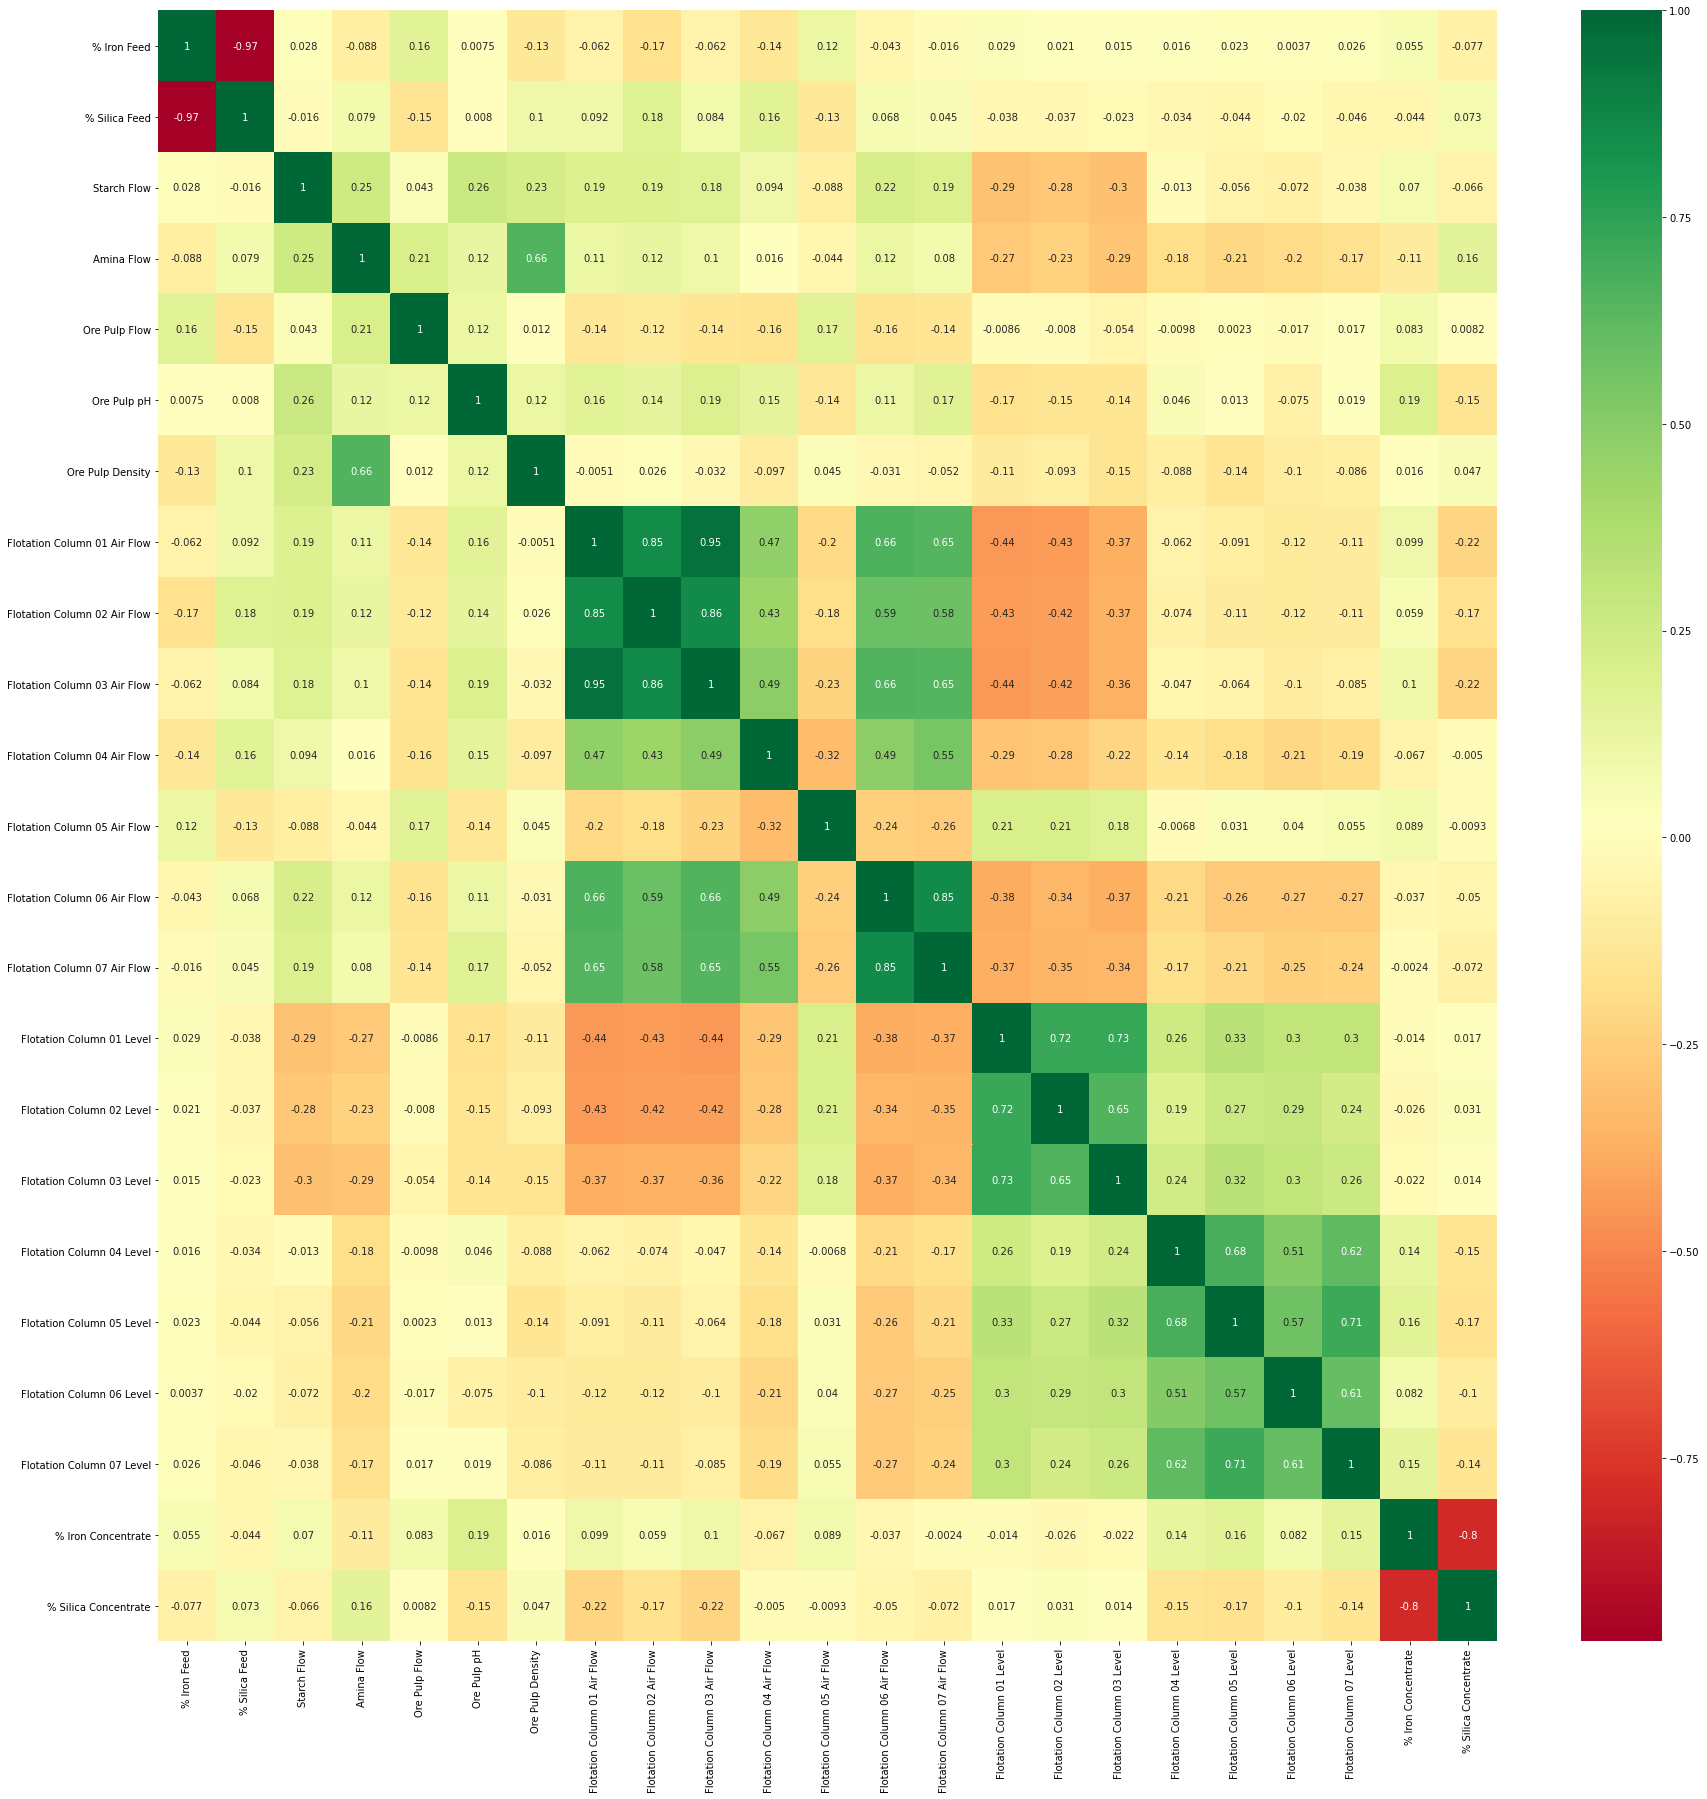

In [0]:

plt.figure(figsize=(30, 30))
cor= df.corr()
corelation = sns.heatmap(cor, annot=True, cmap="RdYlGn")

# WE DONT TREAT THE CORRELATION FEATURES SINCE OUR TASK IS BASED ON CORRELATION ON FEATURES WE DONT ELIMINATE THEM SIMPLY .

WE TREAT THEM WHILE DOING MODELING OF DATA

# **Interactions**

In [17]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False,  
                        include_bias=False)
res = pf.fit_transform(df.iloc[:,1:])
res

array([[5.5200000e+01, 1.6980000e+01, 3.0195300e+03, ..., 4.4769481e+03,
        8.7652100e+01, 1.7161000e+00],
       [5.5200000e+01, 1.6980000e+01, 3.0244100e+03, ..., 4.4769481e+03,
        8.7652100e+01, 1.7161000e+00],
       [5.5200000e+01, 1.6980000e+01, 3.0434600e+03, ..., 4.4769481e+03,
        8.7652100e+01, 1.7161000e+00],
       ...,
       [4.9750000e+01, 2.3200000e+01, 2.6922000e+03, ..., 4.1306329e+03,
        1.0990170e+02, 2.9241000e+00],
       [4.9750000e+01, 2.3200000e+01, 1.1641200e+03, ..., 4.1306329e+03,
        1.0990170e+02, 2.9241000e+00],
       [4.9750000e+01, 2.3200000e+01, 1.1641200e+03, ..., 4.1306329e+03,
        1.0990170e+02, 2.9241000e+00]])

In [19]:
pd.DataFrame(pf.powers_, columns=['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'])

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


# **DATA SPLITTING**

In [0]:
y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                   random_state=30)

#**FEATURE SCALING**

In [0]:
#assignment donors dataset-preprocessing
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

In [0]:
print(X_train.shape,features_train.shape,X_test.shape,features_test.shape)

(516217, 22) (516217, 22) (221236, 22) (221236, 22)


#**FEATURE ENGINEERING**

**Rounding**

Often when dealing with continuous numeric attributes like proportions or percentages, we may not need the raw values having a high amount of precision. Hence it often makes sense to round off these high precision percentages into numeric integers.The data is being converted to proper percentages

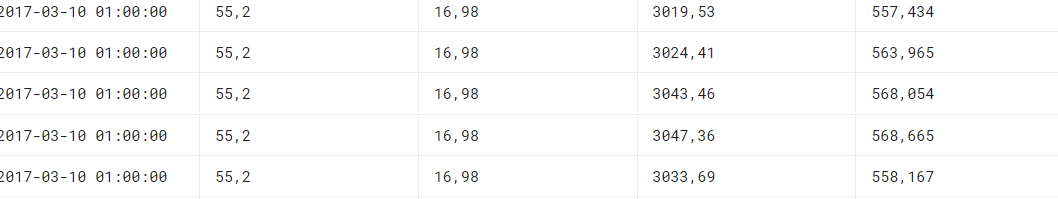
THE RAW DATA IS SHOWN ABOVE

THE ROUND OFF DATA IS SHOWN BELOW

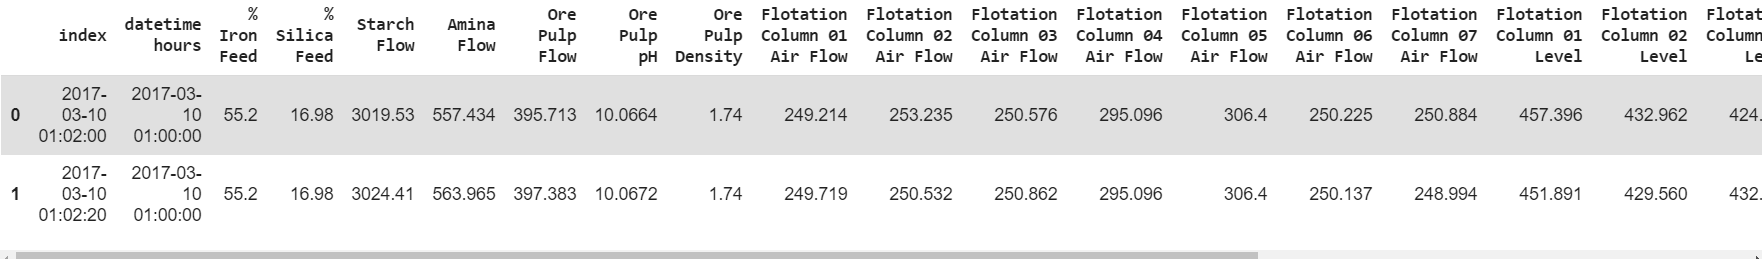


# **INTERACTIONS**

Machine learning models usually try to model the output responses (discrete classes or continuous values) as a function of the input feature variables.

Our interaction dataframe is obtained and we look upon the main columns and we are able to see most of the columns are having high interactions

# **IMPUTATION OF VALUES**

ONE HR = 3600 SECS

SAMPLES AT 20 SECONDS

LET US HAVE ONE RECORD AT END OF 20 SECS

SO, 3600/20 = 180 

WHICH MEANS WE GET 180 RECORDS FOR ONE HOUR SO WE NEED TO WE FIND THE NUMBER OF RECORDS = 180 AND IF IT EQUAL WE ARE LUCKY TO COCNLUDE THERE IS NO VALUE ELSE WE NEED TO FILL THOSE VALUES

HENCE, WE ARE IMPUTED THE VALUES.
